In [154]:
import pandas as pd
import os,sys, imp
sys.path.append('./src/')
import doc_utils_clean as doc_utils
import defines
import numpy as np

In [188]:
doc_utils.doc_db = pd.DataFrame()
doc_utils.add_doc_to_db(r"./tmp/30_kafDalet15_Dana.docx")
doc_utils.add_doc_to_db(r"./tmp/38_kafTet5_Dana.docx")

In [193]:
# doc_utils.doc_db['doc_idx_from_name']=doc_utils.doc_db['doc_idx_from_name'].astype(int)
doc_utils.doc_db_update_stat(1,'val',4)
doc_utils.doc_db.to_csv(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"doc_db.csv"),index=False)
# doc_db =  pd.read_csv("./dataframes/doc_db.csv")
# doc_db.sort_values(by='doc_idx_from_name',inplace=True)
# doc_db.describe()
# doc_db.reset_index(inplace=True,drop=True)

In [194]:
display(doc_db)

,path,file_name,doc_idx_from_name
0,./tmp/30_kafDalet15_Dana.docx,30_kafDalet15_Dana.docx,30.000000
1,./tmp/38_kafTet5_Dana.docx,38_kafTet5_Dana.docx,38.000000


## experiment - check dis-ordered brackets removal

In [27]:
par = "* סאמט:	ובכל אחת מהאופציות גם אם את ממשיכה איתי, גם, גם אם את ממשיכה, נניח עם מטפלת, מטפל אחר, אז אנחנו, יש, יש כאן הפסקה [*סאקל:	כן יש פה XXX [5:20] כולם נמצאים בחופשה] כאילו מיולי עד אה, עד אוקטובר"

In [30]:
par = "*עגמט:	אה אתה עושה עליהם..?"

In [86]:
par = "\t.. הפקקים	"

In [7]:
block = "	החוצה מאותו צוות, כן מאותה מחלקה.. [עגמט: אוקי], עכשיו באיזה שהוא מקום זה טיפה הוריד לי את ה.. הוציא לי את הרוח, כי.. כי כל הזמן אמרתי: אולי הם מנסים פה משהו, אולי הם אומרים: בוא נראה איך הולך לו ואולי.. אבל.. עכשיו הוא אומר שזה מה שהם תיכננו מראש.. הם תיכננו מראש בוא נפריד.. בוא נפריד ואז.. כאילו אותו אחד שאמור.. המנוסה שאמור לבוא ולעשות דברים חדשים, במקום שיישב לו כאן איזה.. כל מיני דברים שצריך לטפל בלקוחות אז.. אז ניתן את זה החוצה.. זה הוציא לי את הרוח בגלל הקטע של השאיפה לעתיד.. אני רוצה את התפקיד הזה ועכשיו הסיכויים נראים חלשים יותר, מצד שני עדיין אני שמח כי יש לי משהו שלא היה לי קודם.. רק שזה יוצר אצלי עומס, שהוא מאוד גדול.. כי יש לי גם את העבודה הרגילה וגם את זה..# %עומס בעבודה%"

In [8]:
block

'\tהחוצה מאותו צוות, כן מאותה מחלקה.. [עגמט: אוקי], עכשיו באיזה שהוא מקום זה טיפה הוריד לי את ה.. הוציא לי את הרוח, כי.. כי כל הזמן אמרתי: אולי הם מנסים פה משהו, אולי הם אומרים: בוא נראה איך הולך לו ואולי.. אבל.. עכשיו הוא אומר שזה מה שהם תיכננו מראש.. הם תיכננו מראש בוא נפריד.. בוא נפריד ואז.. כאילו אותו אחד שאמור.. המנוסה שאמור לבוא ולעשות דברים חדשים, במקום שיישב לו כאן איזה.. כל מיני דברים שצריך לטפל בלקוחות אז.. אז ניתן את זה החוצה.. זה הוציא לי את הרוח בגלל הקטע של השאיפה לעתיד.. אני רוצה את התפקיד הזה ועכשיו הסיכויים נראים חלשים יותר, מצד שני עדיין אני שמח כי יש לי משהו שלא היה לי קודם.. רק שזה יוצר אצלי עומס, שהוא מאוד גדול.. כי יש לי גם את העבודה הרגילה וגם את זה..# %עומס בעבודה%'

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
import hebrew_tokenizer as ht
tokens = ht.tokenize(block)
for grp, token, token_num, (start_index, end_index) in tokens:
    print('{}, {}'.format(grp, token))

HEBREW, החוצה
HEBREW, מאותו
HEBREW, צוות
PUNCTUATION, ,
HEBREW, כן
HEBREW, מאותה
HEBREW, מחלקה
PUNCTUATION, .
PUNCTUATION, .
PUNCTUATION, [
HEBREW, עגמט
PUNCTUATION, :
HEBREW, אוקי
PUNCTUATION, ]
PUNCTUATION, ,
HEBREW, עכשיו
HEBREW, באיזה
HEBREW, שהוא
HEBREW, מקום
HEBREW, זה
HEBREW, טיפה
HEBREW, הוריד
HEBREW, לי
HEBREW, את
HEBREW, ה
PUNCTUATION, .
PUNCTUATION, .
HEBREW, הוציא
HEBREW, לי
HEBREW, את
HEBREW, הרוח
PUNCTUATION, ,
HEBREW, כי
PUNCTUATION, .
PUNCTUATION, .
HEBREW, כי
HEBREW, כל
HEBREW, הזמן
HEBREW, אמרתי
PUNCTUATION, :
HEBREW, אולי
HEBREW, הם
HEBREW, מנסים
HEBREW, פה
HEBREW, משהו
PUNCTUATION, ,
HEBREW, אולי
HEBREW, הם
HEBREW, אומרים
PUNCTUATION, :
HEBREW, בוא
HEBREW, נראה
HEBREW, איך
HEBREW, הולך
HEBREW, לו
HEBREW, ואולי
PUNCTUATION, .
PUNCTUATION, .
HEBREW, אבל
PUNCTUATION, .
PUNCTUATION, .
HEBREW, עכשיו
HEBREW, הוא
HEBREW, אומר
HEBREW, שזה
HEBREW, מה
HEBREW, שהם
HEBREW, תיכננו
HEBREW, מראש
PUNCTUATION, .
PUNCTUATION, .
HEBREW, הם
HEBREW, תיכננו
HEBREW, מראש
HEBREW, בוא
HEBRE

In [82]:
tokens

<generator object Tokenizer.tokenize at 0x2ba5ac6c5900>

In [40]:
imp.reload(doc_utils)
sent_list = doc_utils.remove_multi_dots(par)
sent_list

'*עגמט:\tאה אתה עושה עליהם?'

In [34]:
import re
imp.reload(doc_utils)
def remove_brackets(text):
    return re.sub(r'\(.*?\)|\[.*[^\[]?\]','',text)

In [72]:
par = "לפני סוגריים [התחהלה סוגריים [סוגריים פניים] אחרי פניים] אחרי סוגריים"

In [90]:
par = "\t (..) איך זה היה?"

In [93]:
par ="ומה המשמעויות של זה בעומס של העבודה? אתה מרוויח מזה מנוחה או דווקא...?"

In [95]:
par ="[לוותר על החברים מהעבודה]. זה לא העבודה שמעניינת אותי, כי זה דווקא להיפך. החברים בעבודה, אפשר לצחוק עם האנשים, אפשר, אין לי את זה בבית. (..) והאחרים הם לא ככה, כי כל אחד מחכה כבר ללכת הביתה. אני אף פעם לא הסתכלתי בשעון כשהייתי בעבודה. ברמה של, הסתכלתי, אבל לא ברמה של נו כבר מתי תגיע כבר השעה של, זה אף פעם לא קרה לי. (..) ומבחינת ההנהלה הם כמובן שמחים מזה. אבל, זה לא דבר רצוי אני מניח, זו איזו הפרה של איזה, של האיזון הזה שדיברת. אנשים מטבעם רוצים לחזור הביתה לבית למקום זה המקום הנוח הטבעי שלהם, שם יש את האנשים שהם רוצים לראות, הם הולכים לעבודה כדי להביא פרנסה, ככה זה אמור להיות, ויכול להיות שיש מקום עבודה יותר טוב מבחינת האנשים, ומקום עבודה פחות טוב. אבל אני מניח שבסופו של דבר זה מקום עבודה. אצלי ההרגשה היא שונה. אצלי ההרגשה שזה כאילו שאני בעבודה במקום הטבעי שלי, אני צריך ללכת הביתה, כי זה סוף היום, ויש לי לישון ללמוד וזה. אבל, כאילו זה הפוך אצלי."

In [98]:
par = "כאילו.. אם אני באה והיא יושבת במשרד וזה, זה פחות מפריע לי, אם אני צריכה לעבוד איתה במשמרת, יש יותר אינטראקציה.. אין אפס, השאלה היא מתי זה יקרה, כי מישהי שאמרו לי שהיא צריכה להתחיל לעבוד בתחילת פברואר בינתיים לא הגיעה.. לא יודעת. ואני באמת, אני XXX עובדת קשה, ואין לי בעיה לעבוד קשה. בעיקר.. אני לא מצפה ממנה להערכה מבחינת עבודה וזה, אני מצפה מהבוס הגבוה זה שמשלם לי (א)ת'משכורת, זה יותר חשוב.. אבל מצד שני, לא נעים לעבוד בחיכוך כזה. האופי שלי.. אני לא ישנה, אני יכולה לעגל פינות, אבל אם אני לא אגיד דברים שמפריעים לי אז.. מה כאילו.. מה להוריד (א)תראש ולשתוק? [נכון]"

In [107]:
par = "[=!מהמהם לאות הסכמה]. אז בעצם מה, מה אה... אני מנסה להבין, מה הפריע לך שם, בשיחה אתמול."

In [103]:
par = "[לוותר על החברים מהעבודה]. זה לא העבודה שמעניינת אותי, כי זה דווקא להיפך. החברים בעבודה, אפשר לצחוק עם האנשים, אפשר, אין לי את זה בבית. (..) והאחרים הם לא ככה, כי כל אחד מחכה כבר ללכת הביתה. אני אף פעם לא הסתכלתי בשעון כשהייתי בעבודה. ברמה של, הסתכלתי, אבל לא ברמה של נו כבר מתי תגיע כבר השעה של, זה אף פעם לא קרה לי. (..) ומבחינת ההנהלה הם כמובן שמחים מזה. אבל, זה לא דבר רצוי אני מניח, זו איזו הפרה של איזה, של האיזון הזה שדיברת. אנשים מטבעם רוצים לחזור הביתה לבית למקום זה המקום הנוח הטבעי שלהם, שם יש את האנשים שהם רוצים לראות, הם הולכים לעבודה כדי להביא פרנסה, ככה זה אמור להיות, ויכול להיות שיש מקום עבודה יותר טוב מבחינת האנשים, ומקום עבודה פחות טוב. אבל אני מניח שבסופו של דבר זה מקום עבודה. אצלי ההרגשה היא שונה. אצלי ההרגשה שזה כאילו שאני בעבודה במקום הטבעי שלי, אני צריך ללכת הביתה, כי זה סוף היום, ויש לי לישון ללמוד וזה. אבל, כאילו זה הפוך אצלי."

In [105]:
par = "אה, אוקיי, XXX, אני חוזר מהקשיש, אני אה מתלבש, אה, זה, אני מסדר את כל הדברים, אה, 11 בערך. 11."

In [116]:
par = "\tאה מה יש? [=! בנימת שאלה רטורית].	"

In [136]:
par ="גדכלחלח % לגחעלגעחל % חכקרןםחעםןרקחען%"

In [137]:
f=re.findall(r'%.*?%',par)
f

['% לגחעלגעחל %']

In [131]:
doc_utils.countblock_has_summary(par)

False

In [128]:
imp.reload(doc_utils)
clean = doc_utils.split_block_to_sentences(par)
print("{}\n{}".format(par,clean))
val = 1 if "?" in clean[0] else 0
print (val)

	כן, וזה בא בדיוק בתקופה
['כן וזה בא בדיוק בתקופה']
0


In [129]:
debug_db = pd.read_csv(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"debug_db.csv"))
debug_db

,odd_%
0,"\tכן, וזה בא בדיוק בתקופה,"
1,&
2,אנחנו עכשיו בחברה בגלל שיש את כל הצמצומים אז ח...
3,\tכן וזה בא בדיוק בתקופה
4,\tאבל אני (..) אבל כל מעבר זה היה להכיר אנשים ...
...,...
73,NaN
74,NaN
75,&
76,"*\tזהו שניהם, גם ההיא מהHR אמרה לי שיש אנשים ש..."


### Check sentence number per ducument after POS tagging

In [63]:
for i in range (1,len(doc_db.index)):
    sent_db = pd.read_csv(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"{:02d}_sent_db.csv".format(i)),usecols=['is_client'])
    sent_pos_db = pd.read_csv(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"{:02d}_sent_pos_count_db.csv".format(i)),usecols=['TOKEN'])
    if len(sent_db.index) != len(sent_pos_db.index):
        print("ERRROR: {} sent counter {} , sent pos counter {}".format(i,len(sent_db.index), len(sent_pos_db.index)))
    del sent_db
    del sent_pos_db

ERRROR: 2 sent counter 817 , sent pos counter 841
ERRROR: 3 sent counter 701 , sent pos counter 730
ERRROR: 4 sent counter 548 , sent pos counter 559
ERRROR: 5 sent counter 564 , sent pos counter 627
ERRROR: 6 sent counter 998 , sent pos counter 1026
ERRROR: 7 sent counter 479 , sent pos counter 495
ERRROR: 8 sent counter 407 , sent pos counter 500
ERRROR: 9 sent counter 564 , sent pos counter 627
ERRROR: 10 sent counter 423 , sent pos counter 424
ERRROR: 11 sent counter 1001 , sent pos counter 1005
ERRROR: 12 sent counter 880 , sent pos counter 906
ERRROR: 13 sent counter 886 , sent pos counter 913
ERRROR: 14 sent counter 814 , sent pos counter 827
ERRROR: 15 sent counter 829 , sent pos counter 834
ERRROR: 17 sent counter 580 , sent pos counter 628
ERRROR: 18 sent counter 145 , sent pos counter 149
ERRROR: 19 sent counter 369 , sent pos counter 374
ERRROR: 20 sent counter 320 , sent pos counter 463
ERRROR: 21 sent counter 644 , sent pos counter 678
ERRROR: 22 sent counter 388 , sent p

### Check presense of THERAPIST/CLIENT in body of sentence

In [64]:
doc_to_fix = []
for i in range (0,len(doc_db.index)):
    sent_db = pd.read_csv(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"{:02d}_sent_db.csv".format(i+1)),usecols=['text'])
    catched = sent_db['text'].str.contains("THERAPIS|CLIENT")
    if sum(catched) > 0:
        print ("catched in doc {}: {} sentences".format(i,sum(catched)))
        print(sent_db[catched]['text'])
        doc_to_fix.append(i)
    del sent_db

### Check for empty sentences

In [65]:
for i in range (1,len(doc_db.index)):
    sent_db = pd.read_csv(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"{:02d}_sent_db.csv".format(i)),usecols=['text'])
    catched = sent_db['text'].str.contains("[a-z,A-Z,א-ת,0-9]")
    if sum(~catched) > 0:
        print ("catched in doc {}: {} sentences".format(i,sum(~catched)))
        display(sent_db[~catched])
    del sent_db

### Check for [...[.]..]

In [67]:
for i in range (1,len(doc_db.index)):
    block_db = pd.read_csv(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"{:02d}_block_db.csv".format(i)),usecols=['text'])
    catched = block_db['text'].str.contains(r'\[.*?[^\[]\[')
#     §([^§]*)§
    if sum(catched) > 0:
        print ("catched in doc {}: {} sentences".format(i,sum(catched)))
        display(block_db[catched]['text'])
    del block_db

catched in doc 2: 3 sentences


47      הוא מגיע לאותו.. לכיוון אותו אחד שאני רוצה.. ...
92     \tלא, אני אומר, זה סיטואציה שחוזרת.. זה מקרה ס...
154    \t[לא חששתי, היא לא הפסיקה להגיד את זה], בלי ה...
Name: text, dtype: object

catched in doc 3: 1 sentences


40     אני מרגיש ש.. אני חושב שאמרת שני דברים מאוד ח...
Name: text, dtype: object

catched in doc 4: 8 sentences


41     &\t[ =! נאנח ] אמ, האמת, [ =! בגיחוך ] (..) לא...
44     \tאתה עדיין בסופו של דבר. בסוף. היה איזשהו חוז...
52     \tהייתי יכולה להגיד למשל, סתם. יכול להיות אדם,...
60     \tאני חושבת שקודם כל אנחנו גם צריכים לזכור ש, ...
64     \tאז אתה יודע אנחנו עוד אה, בשלבי היכרות. [כן]...
71     \tאז בעצם קו הגבול, מסתמן בין, האיזור הנעים. ש...
87     \tאז תראה אנחנו ככה, נכנס ל, עומק העניינים ונש...
116    \t(..) אה, לפעמים, (..) קשה לנו לשים גבולות, כ...
Name: text, dtype: object

catched in doc 5: 8 sentences


16    &ויש עוד הצעה אחת שהיא כרגע פתוחה, שדווקא זה ת...
19    &הודעת להם שאם כאילו, אני מול המנכ"ל שם, אז אמ...
31    \t אני חושבת שזה מאוד מעניין שאתה מביא את זה X...
42    \t אני חושבת שה.. הדבר המתאגר מסיטואציות XXX, ...
46    \tזה נראה לי קשור עוד פעם להימנעות מלדבר אולי ...
52    \tלדעתי זה לא מהמקום, אני תיקשרתי את זה, עשיתי...
61    \tאני חושב שזה היה משמעותי שעשית את זה, זה דור...
78    \t גם לי מוזר. יש לנו פגישה ב.. [XXX] בחמישי[י...
Name: text, dtype: object

catched in doc 6: 11 sentences


33     \tו.. זהו הייתי כבר כאילו.. באתי עם המון ציפיו...
55     \tאני פחות אוהב דיסקונט.. שהם עושים זה טוב למש...
90     \tכן.. כי זאת לא חופשה שהייתי באמת צריך [לבמט:...
105    &באתי לשם עם ציפיות.. אמרתי אולי.. XXX גייז תמ...
120    \tגם.. וגם בקטע של לעשות טוב.. זה עושה לי טוב ...
157    \tקשה להיות במקומות האלה שאנחנו עוד לא יודעים....
196    \tלאו דווקא.. אני דווקא.. פעם אולי הייתי שם על...
199    \tכי במקום הזה שאתה בו נורא חזק, ונורא שומר, ו...
319    \tכן, אבל אני מאוד יכולה לראות את הרצון שלך לה...
320    \t[אני אגיד לך גם מה.. ], בתוך הקהילה זה מאוד ...
353    \tלא לא, זה סלביות, אבל פשוט בתוך קהילה  [לבמט...
Name: text, dtype: object

catched in doc 7: 7 sentences


34     \tכי, לא יודעת שאומרים אונס זה, ישר עולה לך אה...
46     \tאה, סתם פשוט גברים שמנצלים אותך שכאילו לא רו...
155    \tהנה, חבר כנסת, ינון מגל, מגיע לגדולות, מטריד...
162    &* \tו.. באיזשהו מקום כאילו, לא יודעת. אני נור...
189    \tכלומר הייתה לך חוויה מקצועית טובה ובגלל [*\t...
190    \tוכאילו, כאילו הוא רצה אה, כאילו לא יודעת, לי...
235    \t[=! אנחה] באמת שזה כיף לדבר עם מישהו על דברי...
Name: text, dtype: object

catched in doc 8: 18 sentences


3     & אמא שלי התחילה להעלות הילוך בקטע דיבורים על ...
7     \t[=!צוחקת] עכשיו תראי, תכלס אני לא חושבת שלקח...
23    \tאי אפשר לא [=!צוחקת]..XXX עכשיו עם הל"ג בעומ...
25    \tלא, זה לא קשור בכלל. בטח לא בהקשר הזה זאת או...
26    \t את מרגישה שאני רואה את זה בעין ביקורתית [לא...
29    \tלא, אז מבחינתי, תראי, זה שלא עשיתי את זה ביו...
33    \tלא,לא, אני לא מדברת רק על המרפסת באופן ספציפ...
37    \tוואי, כבר 4, אני שומעת את החדשות כזה של 4, ו...
41    \tכן, אם אני בעבודה אני בכלל לא יכולה לענות לט...
42    \t ואחרי השיחה שלנו, [XXX] עלה משהו סביב ה.. מ...
51    \tעצוב לי שזה ככה כאילו כי.. כל פעם אני אומרת ...
54    \t אבל אני דווקא חושבת על מה שאמרת היום, שאת נ...
55    \tאבל אני כן מצד שני, תראי, זה שאני באופן כללי...
69    \tאני חושבת שאף פעם לא חשבתי על זה בתור XXX. כ...
71    \tזאת אומרת שאני יושבת ומתפדלאת לי ולא בא לי ל...
80    \tלא, לא חסרת תקווה, לא אמרתי אין דרך, אמרתי י...
87    \tכן, אבל ההחמצה הכי גדולה זה זה שלא עשיתי כלו...
88    & בערך איזה חודש-חודשיים אחרי שעברתי לדירה

catched in doc 9: 8 sentences


16    &ויש עוד הצעה אחת שהיא כרגע פתוחה, שדווקא זה ת...
19    &הודעת להם שאם כאילו, אני מול המנכ"ל שם, אז אמ...
31    *\t אני חושבת שזה מאוד מעניין שאתה מביא את זה ...
42    *\t אני חושבת שה.. הדבר המתאגר מסיטואציות XXX,...
46    *\tזה נראה לי קשור עוד פעם להימנעות מלדבר אולי...
52    *\tלדעתי זה לא מהמקום, אני תיקשרתי את זה, עשית...
61    *\tאני חושב שזה היה משמעותי שעשית את זה, זה דו...
78    *\t גם לי מוזר. יש לנו פגישה ב.. [XXX] בחמישי[...
Name: text, dtype: object

catched in doc 11: 1 sentences


1    \tבסדר גמור, ככל שזה יותר מאוחר זה אפילו יותר ...
Name: text, dtype: object

catched in doc 12: 4 sentences


40     \tהם לא מזמינים מראש את הנשואים.. כי זה עולה כ...
86     \t[אני רוצה] כי אני יודע שמה שבאמת חשוב זה ההת...
94     \tזה מאוד מזכיר את ה.. פעם תיארת את הדינמיקה ש...
113    &הזמן היחיד שלא היה לי את זה, זה היה בעצם אחרי...
Name: text, dtype: object

catched in doc 13: 4 sentences


46    \tלא.. לא הגבתי אחרת.. כאילו.. הגבתי בקצת בהתג...
77    \tזה גם מה שדיברנו בפעם שעברה.. [עגמט: כן], הה...
84    &בדרך כלל אני.. מה שאני מנסה לעשות זה להגיע למ...
86    \tברמה שאפילו אנשים לא יכולים לעזור לי?.. כי ק...
Name: text, dtype: object

catched in doc 14: 1 sentences


74    \t[לא להיפטר], אהה כן לקום ולעשות, ויש דברים ג...
Name: text, dtype: object

catched in doc 15: 1 sentences


25    \tאני לא יודע אם מכורח הנסיבות שאנחנו נפגשים ב...
Name: text, dtype: object

catched in doc 17: 36 sentences


17     \tולא רציתי לעשות את זה בצורה כזאת. אני גם מרג...
25     \tה-12 ליולי זה הפעם האחרונה [CLIENT: [=! משתע...
39     \tכן אבל ה, הקטע הוא שכאילו היא גם לא מנסה למצ...
44     &לא אני יגיד מה, במסיבת רווקות היא, תכננה כאיל...
60     \tכן [=! גיחוך] [THERAPIST:\tו...] בסדר היא תק...
64     \tלא זה רק אה, אה א״ר ונ״ה [שמות של חברות], א״...
68     \tאז בסדר אז אוקי סבבה אבל בואי נחשוב כאילו, א...
88     \tאה, החברה השנייה בהריון, שמירת הריון אז קצת ...
92     \tאה קצת כאילו למרות שלא נראה לי שזה מזיז לה י...
94     \tאני לא יודעת כמה הן חברות טובות [THERAPIST:\...
95     \tמעניין מה ש״י מרגישה אליה. אם היא XXX [17:42...
96     \tנראה לי שהיא כן התעצבנה עליה באיזשהו מקום כא...
110    \tכן, כאילו נראה לי אה, בס-היה כאילו ליזום אה ...
115    \tו... אמרת להן? כאילו, היה בעצם את הדיבור הזה...
125    \tהיה בה משהו, זה נשמע שהיה בא משהו שכאילו בה...
126    \tלא הטון שלה ב, גם ב, בהודעות נגיד (..) הרי א...
128    \tאבל כאילו הדרך שהיא רשמה ו, כאילו הציבה את ז...
132    \tלא יודעת נראה לי שהיא 

catched in doc 18: 4 sentences


35    \t ברוך השם [כן] כבר אמרנו [אמרנו המון] XXX XX...
48    \tבאיזשהו מקום אני מרגישה ש, אממ, (..) ה, אתה ...
52    \t [=! צוחקת] אני באמת, אני, אני חווה איתך את ...
56    \tכשאני נתקלת בזה בטיפול, שנגיד אממ, אני שומעת...
Name: text, dtype: object

catched in doc 19: 7 sentences


40     \tאה, שאלתי, כאילו אמרתי בעצם ש, תארת אינטראקצ...
52     \tאה, לפעמים אתה נע בין שני קצוות, לפעמים אתה ...
77     &נגיד באלג'יריה זה התחיל המהפכה אה, עם אה, אה,...
83     \tלא XXX, אה הוא היה שותף עם שלוש אחיות שלו בד...
99     \tמסתורי זה נשמע דיי סקסי כזה, דיי מגרה, יש פה...
105    \tילד אוהב בת, גבר אוהב אישה [כן] זה XXX ופגיש...
219    \tקודם כל שתדע לך שזה, זה שלב ראשון שהוא טוב, ...
Name: text, dtype: object

catched in doc 20: 25 sentences


0      \t היום, XXX מבטיח [XXX טוב] אז תראי. זה בעיקר...
9      \tXXXX... רחובות [אוקיי].. צריך מיקוד? [לא..זה...
10     \t לא יודעת, יכול להיות, הם לא מעבירים אליי את...
11     \tלא משהו האמת [=!צוחקת] [לא משהו?..] לא.. בעב...
13     \tתראי, זה לא משהו חדש XXX, אבל עם ה..מנהלת הי...
18     \tהייתה.. בערך.. אני מדברת על הבוסית, כאילו המ...
24     \t [=!צוחקת] [הרגשה אחרת...] יוצא לך הרבה לעבו...
30     &שני דברים כן טובים שקרו השבוע אולי, נתייחס למ...
32     \tלא, האמת שפניתי לאח אחר [ממ], כי הוא כזה.. א...
34     \tכן, זהו. עכשיו הכי קטע שבגלל שהייתי מבסוטה, ...
43     &אז כאילו אפילו בפעם הזאת, אחי בכלל היה בסוף ש...
48     \tכאילו היו שלבים שלא רציתי בכלל, והיו שלבים ש...
52     \tלגבי הזוגיות יש סיכוי תיאורטית אבל אני חושבת...
55     &אתמול אפילו מישהו באה ואמרה לי ט"ו בשבט שמח, ...
62     \tאותו XXX.. זה שאחרי משמרת אני עייפה פיזית אז...
64     \tאהה..לא כוח פיזי בהכרח אלא אנרגיה [אנרגיה, כ...
68     &במוצאי שבת אני עשיתי את הדבר הכי מפגר בעולם. ...
69     \t אבל, בכל זאת דווקא במ

catched in doc 21: 5 sentences


13    \tאז מסתבר שזה כנראה אלרגיה זה לא מחלה. כי זה ...
44    &לפני איזה חודש בערך בחדר כושר, יש חדר כושר שא...
70    \tיש לי אה, יש לי כאילו, יש לי כזאת חוויה. באו...
75    &אמרתי לך יש איזה חבר שהגיע לXXX. שהוא לא גר ב...
99    &אני חוזר לדבר על ש"ף. זה אותו דבר, ש"ף די מוד...
Name: text, dtype: object

catched in doc 22: 29 sentences


7     & שבוע מרתק עבר על כוחותינו. לפני שבוע, ביום ר...
9     \tכן,והוא ישר אז 'מה,כבר מספידים אותי, כבר זה,...
10     \t זה כנראה מסמל עבורו איבוד.. [ברור] XXX [ברור]
12    \t אני זוכרת שאפילו דיברנו אז,שסיפרת לי,שהוא ב...
14    &אז יום שני בבוקר נסעתי הביתה, התארגנתי קצת, ו...
15    &ולמחרת חזרתי ובערב עבדתי [וואו]. אז יום שלישי...
18    &אז באותו יום היא יחסית מאוחר דיברה איתי רק, ג...
19         \t ספרת בעצם עיתונים יש [כן], בכל שקית? [כן]
25    &כן אבל את יודעת, אני יושבת לקרוא, הוא מנמנם א...
28    &שנגיד לפני שנה נסעתי איתה לפולין, שבאופן מדהי...
30    \tממש לא. [לא?] ממש ממש לא.. זה כאילו נגיד עכש...
35    \tהדברים שציפיתי הם דברים נקודתיים, נגיד, הוא ...
56    &אתמול דיברנו אז היא שואלת אותי יום שלישי כאיל...
58    \tלא, לא איבדתי את המוטיבציה, אבל זה פסק כאילו...
59    \t לא, אל תדאגי, זה בסדר.. אני מסדרת לי את זה ...
66    \tלא, היא כרגע מבוטלת [מבוטלת לחלוטין?] בסבירו...
69    & בהתחלה היא אמרה XXX בחדר איזה מישהו שכאילו ע...
71    \tאני לא חושבת שכרגע אני צריכה להלחיץ (א)ת

catched in doc 23: 12 sentences


2     &עכשיו יותר טוב, הסוף שבוע היה.. ממש על הפנים....
9     & יה ככה עוד איזה קטע שעם כל העניינים של המשכנ...
11    \tתראי, אני יודעת, זה לא שזה כזה מפחיד, זה לא ...
18    \t גם זה שהוא לא דיבר איתך [כן] ואז פתאום הביא...
23    \tוגם אם אני סתם נעלבת, אני עדיין נעלבת [נכון]...
25    \tאני..בטח שאני נותנת לעצמי לגיטימציה, אבל אין...
36    \tלא, לא, זה לא בכלל.. XXX כזה שעולה.. זה עצוב...
46    \tכן, למרות, את יודעת..זה לא כזה.. קשר אדוק וז...
53    &גם לפני כמה שנים, זה מצחיק, דודה שלי שהיא התא...
55    \tלא בקטע של אכזבתי (א)ת'עצמי, בקטע של.. באסה ...
61    \tלא, זה לא בקטע של תלות [ממ].. [להישען..] זה,...
77    \tברור, זה ברור [XXX חלק מהרשימה של זה..] אני ...
Name: text, dtype: object

catched in doc 24: 8 sentences


31     \tאז אמ, כי זה, שוב ממש דיברנו על התדמית. מאוד...
39     \tכן. יש לי איזה, [ =! כחכוח בגרון ] אמ, אז בד...
44     \tיש אה, אני מאמין ש, אני מאמין שיש איזה מחזור...
77     \tלא. אני לא יודע לשחות, ואני מפחד ממי(ם) – אנ...
116    \tכאילו על התקתקנות, [[ =! צקצוק בלשון של "לא"...
128    \tאת ה, אני חושב שהמקום של ה, אהבה ה, טוטאלית ...
135    &את יודעת איזה זכרון עולה לי, שהכי חרוט לי? שה...
173    \tלא מאה אחוז. [מה אתה מרגיש,] אני גם – אני גם...
Name: text, dtype: object

catched in doc 25: 32 sentences


3      \tלא זה מטורף, אני פשוט..איך שאת מדברת איתי רג...
6      &אז ביום שישי אני פגשתי את הבחור הזה שעוזר לי ...
8      \tבטח [אהה]. כאילו יום בחירות נחשב יום שבתון, ...
14     \tכן, זה מוזר לי [=!צוחקות] עכשיו המדף הזה צרי...
16     \tעוד לא חשבתי על זה עד הסוף, אבל נגיד.. למשל ...
20     \tזהו, זה ה... מקום בבית יש, ומבחינה אסתטית, נ...
24     \tכן, אני.. לא תמונות יש לי כבר מקום.. יש עליו...
25     \t אני חושבת שהמשימה של.. ככה, אני לא אומרת XX...
28     \tלא, זה בכלל לא אותו דבר [לא ברמה..] בכלל לא....
35     \tאני בודקת אותו מול הקבלות להסתכל באמת שזה.. ...
38     \t מבחינת כאילו מוצרים נגיד, מזון.. [כן] ביגוד...
39     \tלמרות שמצד שני זה דבילי כי אני יחסית ההוצאות...
42     \t למה, לפעמים יש לך.. [לפעמים XXX] XXX היית ר...
43     \tתראי, נגיד.. אם הייתי עובדת חמישה ימים בשבוע...
44     \t ועם כל העומס הצלחת [כן], לעשות את מה ש.. [כ...
51     \tXXX הגדרנו את זה, שכאילו אני..עושה את זה והכ...
55     \tחשבתי במקביל לזה, אם זה נראה לך, לעשות משהו ...
57     \tפסח מבחינתי אין לו שום

catched in doc 26: 5 sentences


1      &ההגעה לפה בשעות של הבוקר, הזכירה לי את העבודה...
3      \tבאמת XXX. זה, כי אני נתנייתי במקור [אני יודע...
55     \tבהכל, מה זה בהמון [כן]. זה עם ג"י [עם XXX]. ...
91     \t אני חושבת ש.. מעניין באמת, לפני שאני (א)יענ...
113    \tאני לא חושב שזה קרה לי עם מטפלים כאילו [למה?...
Name: text, dtype: object

catched in doc 27: 19 sentences


0     \tהבאתי את הדבר הזה ששכחתי XXX פעם קודמת [XXX]...
8     \tטוב. למרות שלכאורה פחות התעסקתי בדברים של ה....
11    &היום למשל, XXX אז היום שבו נעקרתי מביתי, ועבר...
15    &אז זהו ש.. רוב השנים יצא שרק אני באה. כאילו א...
18    &לא, פעם בשנה [פעם בשנה..] אין לזה משמעות מבחי...
20    \tלא, אני.. במאמר מוסגר, בהתחלה הייתי באה לפה ...
21    \t זה בדרך כלל תארים יותר מתקדמים.. [אהה] סטוד...
22    \tדווקא בפורים, היה פה סגור XXX יחסית לזה שזה ...
25    \t כן, פה זה.. [פה,כן] שומרים XXX [אוניברסיטה ...
32    \tהיה משהו..היה טוב בתקופה הזאת של הלימודים שא...
39    \tלא, השילוב של שני הדברים.. נגיד סתם, נגיד אם...
42    &וואי, בשבת אני, כמעט לפני סיום המשמרת, איכשהו...
50    \tגם זמן,אבל גם פנאי נפשי [נפשי..] בטח [בעיקר]...
51    \t וזה, ככה חשבתי לפעמים, אם זה מפתיע אותך ההת...
52    \tכי.. זה לא דברים שאת יכולה למשוך אותם, כי נג...
54    \tנכון, אבל את לא יודעת בכמה זה כרוך [כאילו לא...
55    \t אהה בגלל שאת פותחת [XXX] פוליסה חדשה [XXX ח...
57    &כי אז לפני שעשיתי את הפוליסה הראשונה, היה

catched in doc 28: 11 sentences


41     \t למה אתה XXX, במה זה XXX? [אם אני היום חוגג ...
49     \tיש פה בעיה. כי זה לא, איך שהיא הייתה מציגה א...
60     \tזה כאילו אני.. אני בעצם, היא אמרה לי את זה פ...
62     \tזה כאילו.. זה גבול עדין עדין עדין, כי כאילו ...
68     \t אז זה דפוס שחוזר על עצמו, שאתה עוצר XXX מתג...
73     \tאני לא יודע, אני .. אני.. אני חושב שאין מערכ...
98     \t אני חושבת שגם יש משהו כיפי בכעס. כמה שהוא ש...
116    \tכן, אני לא יודע גם [למה] והוא.. הוא מאוד נקי...
136    &יש לי ידידה טובה שקוראים לה ל"ת, שעבדנו פעם ב...
166    \t ברור, אבל זה לא הסיבה שאתה לא מביא את השיחה...
172    \tמושפל אבל זאת פרשנות, זאת לא המציאות. חוויה ...
Name: text, dtype: object

catched in doc 29: 16 sentences


2      \tואני צריך לשלם [כן, אני אתן לך את השובר]. וו...
5        \t מהבוקר, אני פה במזגן [אהה, במזגן]. [=!צוחקת]
28     \t[XXX] מה שחשבתי בנסיעה, שכאן [והתחלת להגיד ח...
36     &אתמול, יש עוד דבר שמטריד אותי, קיבלתי הצעה עב...
40     \t אני חושבת שכל מה שאתה אומר, זה מאוד מאוד מת...
42     &ושאלתי את עצמי והיה לי חלומות בלילה עליה מפה ...
47     &עכשיו כאילו א"ה בעצם, אני כן גאה בעצמי על איך...
54     \t אני לא חושבת שזה למה אתה בא כועס, אתה בא כו...
76     \t סליחה, אני רק אגיד, קטעתי אותך,  שהאסוציאצי...
82     \t אני חושבת שזה מאוד מאוד קשה לחיות בחוויה שכ...
85     \t הקטע הזה שהיא קיבלה את שלה והוא לא קיבל את ...
93     \t אמרת ש.. למדת לשקר, לזרוק את המרק XXX [הכל ...
96     \tשקר זה כאילו להגיד משהו, להגיד משהו שהוא לא ...
100    \t אתה חושב שה.. שה.. מקום שבו אתה מתקשה לכתוב...
105    \t אני חושבת שהדוגמה עם המרק והסוכרייה שכאילו ...
108    \tכי זה משלב את כל מה שרציתי בעצם. זאת אומרת, ...
Name: text, dtype: object

catched in doc 30: 17 sentences


3     &שנסענו.. לפני שנה וחצי לפורטוגל אז היא באה, ה...
7     \t[=!צוחקת] עכשיו תראי, תכלס אני לא חושבת שלקח...
23    \tאי אפשר לא [=!צוחקת]..XXX עכשיו עם הל"ג בעומ...
25    \tלא, זה לא קשור בכלל. בטח לא בהקשר הזה זאת או...
26    \t את מרגישה שאני רואה את זה בעין ביקורתית [לא...
29    \tלא, אז מבחינתי, תראי, זה שלא עשיתי את זה ביו...
33    \tלא,לא, אני לא מדברת רק על המרפסת באופן ספציפ...
37    \tוואי, כבר 4, אני שומעת את החדשות כזה של 4, ו...
41    \tכן, אם אני בעבודה אני בכלל לא יכולה לענות לט...
42    \t ואחרי השיחה שלנו, [XXX] עלה משהו סביב ה.. מ...
51    \tעצוב לי שזה ככה כאילו כי.. כל פעם אני אומרת ...
54    \t אבל אני דווקא חושבת על מה שאמרת היום, שאת נ...
55    \tאבל אני כן מצד שני, תראי, זה שאני באופן כללי...
70    \tאני חושבת שאף פעם לא חשבתי על זה בתור XXX. כ...
72    \tזאת אומרת שאני יושבת ומתפדלאת לי ולא בא לי ל...
81    \tלא, לא חסרת תקווה, לא אמרתי אין דרך, אמרתי י...
89    &לא יודעת אם סיפרתי לך, אבל ממש בערך איזה חודש...
Name: text, dtype: object

catched in doc 31: 9 sentences


9     \tזה לא היה ממקום [זה היה] של לא חוקי, זה היה ...
14    \t בוא נסתכל על זה רגע באמת, בצורה אחרת כאילו....
18    &אני ראיתי אפילו, את יודעת, במקרה במקרה ה.. לא...
34    \t אני חושבת שמשם העצב. ש.. הפער הזה משמר איזה...
50    \tמוזר. אנחנו יושבים באימון, כאילו ממש מוחשי [...
62    \tלדעתי כן, אני לא זוכר.. אין לי, אני יכול לבר...
81    \tאני לא, לא חושב שעשיתי את זה פה אף פעם.. [אב...
84    \tאבל  זה המלכוד, זה המלכוד. פה אתה.. [עכשיו ז...
86    &אפילו עם המורה שלי לשחייה, ק"י, אני רואה איך ...
Name: text, dtype: object

catched in doc 32: 10 sentences


3     &ו.. ביום, מוצאי שבת, ככה סימנתי לי איזה תכניו...
8     &עכשיו שבוע שעבר היה לי חופש יום רביעי, בגלל ש...
12    \tזה הרגשה טובה [ממ], בהחלט. אני רוצה כאילו גם...
17    \t ממ [אז] הוא תמיד נוכח פה בחדר [ברור] אני שו...
28    \tיכול להיות, כי תראי, נגיד סתם, אולי עם כל ה....
31    &מדי פעם יוצאת למרפסת ככה נגיד לשאוף אוויר, אנ...
55    &יש לי הרבה פעמים גם קטעים כאלה שפוגשים אותי מ...
59    \tלא כי אני בטח פתוחה לשמוע את הדעות והעמדות ש...
64    \tכי בעיקרון, כמעט כל יום שיש לי פנוי, אני לא ...
80    \tנכון, כן [ממ].אבל אני חושבת ש.. שעצם זה שאני...
Name: text, dtype: object

catched in doc 33: 10 sentences


0     \t[3:30] רגע, רק לראות שזה XXX [XXX]. למרות שא...
6     &יום חמישי רבתי עם ג"י ולא, יצאתי, אני אפילו ל...
15    \tזה אפילו מעצבן אותי שאת אומרת את זה [אני יוד...
23    &ראיתי את אבא שלי עושה לי את זה עכשיו, אותו דב...
24    \t למה? למה אי אפשר להגיד לך ישירות? אתה יודע,...
27    \tזה גם מה שג"י אומר, ג"י אומר לי, תגיד לי מה ...
63    \t אמרתי לך כבר, שאני חושבת שהטחינה הזאת, הקשה...
67    \t נכון, נכון. גם אמרת פעם שעברה שבעצם אתה לא ...
94    \tזה לא קשור אלייך, ש"ן.[ אני יודעת, אבל אם זה...
98    \t אבל בוא נשאר רגע עם מה שהיה פה, בינינו עכשי...
Name: text, dtype: object

catched in doc 34: 7 sentences


0     \t אהה.. רציתי לפתוח את מה שקרה פה שבוע שעבר, ...
4     \t אני לא יכול, מה זה מוכן? אבל אני, אני לא יכ...
7     \tאבל למה זה הולך לשם, למה ישר.. [כי מה אני אמ...
9     \tאני מסכימה איתך, צ"י, שיכול להיות שמשהו בסגנ...
17    \t אני חושבת שזה באמת, שזה באמת, שיש למטבע הזה...
20    \tנכון, זה בדיוק מה שקורה. וזה מה שקרה לי עם א...
56    &הוא שלח לי עכשיו הודעה אני יכול לבוא היום? כן...
Name: text, dtype: object

catched in doc 35: 6 sentences


19    \tלדעתי ה.. כאילו למה זה משנה, אבל, בעצם? השאל...
20    \t אני חושבת שהשאלה הזאת היא XXX שאלה.. בוא ננ...
36    \t אני חושבת שיש פה.. עניין שהולך גם לכיוון של...
46    \tאני לא יודע, או שאני פשוט לא יודע איך לעשות ...
69    \t אני חושבת ש.. אני לא יודעת למה קשור העצב, ש...
72    \t עכשיו אבל יש לך חופש, זה בדיוק העניין, אף א...
Name: text, dtype: object

catched in doc 36: 4 sentences


13     \t אהה, בסדר גמור, אהה מה בסדר גמור, פחות או ...
30     \t כדי לעשות את זה פשוט -  עם ב"ק, כדי, [עם ב...
49    \tלא, אבל [שגרתי] אני מדברת על משהו נורמטיבי כ...
92    \tו, החוויה הזאת מאוד, מאוד משתקפת כמה פעמים ש...
Name: text, dtype: object

catched in doc 37: 7 sentences


18    \tזאת פשוט נשמעת חוויה ככה משמעותית וקשה [כן] ...
29    \tכאילו אתה לא, לא הצלחת כאילו באותה, כאילו בא...
39    \tאני מבינה. אני, אני רואה את המקום שמאוד, חשו...
41    \tאבל, אולי יש משהו בזה שמשקף, גם אם לא במציאו...
63           \tלהוציא מזה, לזקק מזה [כן] XXX [הכלה, אה]
67    \tאממ, אני כן חשבתי על זה גם בעצמי, אה במהלך ה...
71                    \t [=! צוחקת] של, של  [של ללמוד] 
Name: text, dtype: object

catched in doc 38: 7 sentences


50    \tוואו. אתה בעצם אומר שהתחושה הזאת מלווה אותך,...
56    \t [=! צוחקת] אבל, איזשהם, דרישות נוקשות מעצמך...
62    \tהתשוקה שאתה רוצה, שהיא תהיה לך, היא לא התשוק...
71    \tשל לחשוב איך אתה צריך להגיע [איך נכון] ואיך ...
73    \tלמה בעצם ה, התגובות שלך הן לא נובעות מתגובות...
83    \tעיבוד של הסיטואציה [כן] כל משפט כבר בצורה שי...
87    \tב, כן, אבל יש משהו לא רק מאיים במובן של האם ...
Name: text, dtype: object

catched in doc 39: 6 sentences


16    \tבדרך המון, המון המון היבטים [כן] ואיך זה מרג...
20    \t (..) אז בעצם התקופה הזאת שאתה עובר גם גורמת...
26    \tזה נורא מתקשר לדברים שדיברנו עליהם [נכון] גם...
30    \tפונקציונלי, ש, ש, ממלא את הצרכים בשביל הבית....
45    \tלגמרי. עוד פעם, אם בעבר כאילו נגיד ה (..) הח...
89    \tמעולה, אז זה אני חושבת, (..) בין הפעמים הראש...
Name: text, dtype: object

catched in doc 40: 10 sentences


26     \tהם החליטו פתאום, אחרי שכבר הייתי בשני ראיונו...
43     \tהרבה פעמים על זה ש, מבחינתך, להיות בסיטואציה...
47     \tנשמע גם ש, אה, אתה אומר עברתי יותר להשתמש בר...
53     \tאבל אני חושבת ש, אני לא, אתה, אני לא חושבת ש...
55     \tחסר את הצד הספונטני, [נכון] כי ה, כי ההצגה ה...
78     \tאני יכולה לספר לך, על תהליך שאני רואה בטיפול...
80     \tסיסמה או הגדרה, וגם להציג את זה מכל כיוון אפ...
90     &הסיטואציה שבה עברתי את הניתוח קיצור קיבה, כאי...
106    \tמאוד טבעי כי, כי, עד נגיד אה, XXX לקראת סוף ...
146      \tזה משהו שחווית בעבודה [נכון] אותה, XXX [נכון]
Name: text, dtype: object

catched in doc 41: 12 sentences


21     \tתראי, מבחינת שכר אני קצת [XXX שלה] זהו, אז א...
22     \tאבל יש משהו יותר יציב במגזר הציבורי [נכון] מ...
24     \t (..) ובטח יש אפשרות אולי להתקדם בהמשך, [זהו...
45     \tאני אומרת ש, קודם כל על הממצאים שם לא הפתיעו...
52     \tאת הלחץ תמיד הרגשתי, זאת אומרת, כי הוא בא לי...
53        \tשיש בזה משהו שאתה תתמודד איתו [כן] ו, [נכון]
85     \tאני לא צריך את העניין, אין לי בעיה שלא יתעני...
89     \tהן זהירות בהבטחות שלהן, זה העניין, הן מאוד ז...
98     \tגם, גם יכול להיות שזה בא מהמקום הזה, וגם יש ...
140    \tבעצם אמרת כאילו כשהגדרת באמת מה חשוב לך במקו...
142    \tכן. והיה משהו, שאני חושבת [תלותי כאילו?] באי...
146    \t [=! צוחקת] ב, [בסדר] פגישה הבאה שלנו, אה, א...
Name: text, dtype: object

catched in doc 42: 10 sentences


23     \tכן, אני אמור לנסוע באוקטובר, לשבוע לשם. [ולכ...
24     \tהאמת שזה באמת הבנה חזקה ש, שיש בצורך ובגושפנ...
30     \tזה גם מתנשא, בטח, גם מתנשא, שאתה ככה וככה. ו...
66     \t (..) אני רוצה שבוע הבא אני לא אהיה, אבל אחר...
68     \tוהם נמצאים בתהליך של דיי רחב, שחלק, שצריך לא...
85     \tכי, אצלך זה ככה נושא שהוא, אפילו יותר XXX כי...
109    \tתגובתי לXXX [כן, בדיוק] אלא ככה לחשוב מראש [...
113    \tאתה לא, אתה לא ככה ואפילו יש משהו בזה שהוא כ...
115    \tלתת מקום ליצר, לא, [כן] לצבוע את הכל, אבל מב...
122    \tמסכים לגמרי, כן. [וזה,] כנראה שבסופו של דבר,...
Name: text, dtype: object

catched in doc 43: 6 sentences


47    \tאפשר לשמוע נגיד בתכלס כאילו, מה קורה שם? [כן...
69    \tהשאלה מה שאני שואלת זה, (..) אני יודעת שהמון...
70    \tכי גם, המקום שאני נמצא ביני לבין עצמי ממילא,...
77    \t [=! צוחקת] בנוגע ל, למה קורה כשאתה במקום רג...
94    \tאני מבינה. אני חושבת גם שזה נכון יותר לעבוד ...
97    \tלא, כי, כי ככה, כי אני מבין ש, (..) הגישה וה...
Name: text, dtype: object

catched in doc 44: 22 sentences


4      \tויש לך פה מים, [תודה] אני הולכת שנייה למלא, ...
55     \tכן. כי אם זה היה נפשי בלבד, אז.. אוקיי. (..)...
57     \tזה נשמע שאתה מתאר מצב, שכשאתה מרגיש את הסטרס...
62     \tכן, באמת גם שיש את המקרה המאוד מעציב הזה. של...
67     \tכן! [ =! המטפלת צוחקת ] יש לי, יש לי, כן. יש...
68     \tאני מסכימה איתך ש, קורים דברים לא צפויים. וש...
72     &אבא שלי מת מוקדם. אבל הוא אף פעם לא פחד מ, [ ...
89     \t(..) בעצם אתה, יש לך בעיה XXXX זה חוסר שוויו...
91     &זה שאני, התעצבנתי, אני לא – נראה לי גם מאיזה ...
94     \tשקשה אולי באמת למצוא לה מילים. מה שלמבוגר אנ...
100    \tאנחנו מפנימים, איזשהי דמות, כמו של איזה הורה...
105    \tפשוט הרבה פעמים, ב- בהרבה סגנונות של הורות, ...
108    \tאני, אני כן מכיר, ואני מבין כאילו, אני עדיין...
151    \tאז ירדתי איתו, הוא בנאדם ממש נחמד כאילו בנאד...
160    \t>באמת העניין של בידיים שלך, זה לזרוק את זה ל...
167    \tאתה יודע אתה, אני שומעת אותך, חוויה לא כל כך...
172    \tשזה בדיוק המקום של ה- גם לקחת חלק במשחק. [כן...
174    \tאז אני יכולה לתת לך, [

catched in doc 45: 30 sentences


4      \tאני מצונן, כן [=! מטופל אומר 'אהה'], אז זה כ...
11     \tאז עניתי בהפוכה [=! צוחק]  XXX XXX אם עובדים...
13     \t[=! נכנס לדברי המטפל] גם אני אני בדרך כלל אנ...
26     \tאו במראה או בעצמי כי XXX  [=! המטפל אומר משה...
27     \tהתקדמות במה? ב, ביכולות המשחק? אני אני לא מצ...
39     \tאת הדמי מנוי לנטויז'ן ובזק, אפילו שידעתי שאנ...
52     \tמה זה נותן לך?XXX  [=! המטפל אומר משהו תוך כ...
76     \tזה בעצם אישה היסטרית [=! מטפל אומר 'כן'] מדב...
77     \tואז בעצם אני מבין שהחוויה חוויית האוננות שלך...
80     \tאני בעל הבית, אני כבר לא שם [=! המטפל מהמהם ...
81     \t עשית פה איזשהו הקשר מעניין כי, אתה יודע, אפ...
100    \tאתה יודע זה מביא אותי ככה לחשוב, את הזוגיות ...
102    \tאמרת real life וזה מה זה ככה משהו שתפס אותי ...
110    &היינו בחברה מעורבת, בני עקיבא, איסור היה  XXX...
112    \tכן היה כן היו XXX XXX  היה בסדר איכשהו כלומר...
119    &יחסית היו היה שקט בב(ית) אמא עודדה קצת מלשינו...
132    \tאה הוא ליטף לי את הבטן אבא שלי ליטף לי את הב...
134    \tאהה הייתי מת על אבא של

catched in doc 46: 6 sentences


19     \tזה דבר ראשון. דבר שני, טוב, זה משהו שבעצם אה...
59     \tבעצם אתה שואל, מה אנחנו עושים פה יותר, או מה...
79     \tאה, (..) אה, נגיד אני נכנס לנעליים שלך, לצור...
87     \tהייתי שמח להחזיר אותך רגע, אה, להתייחסות הרא...
148    \tאה, (..) אה, דברים דמיוניים, אה, (..) כאילו ...
183    \tאני יכול להבין אבל שהמעמד הזה שהוא מעמד גדול...
Name: text, dtype: object

catched in doc 47: 7 sentences


61     \tעם י"י, הוא הומוסקסואל, אתה מפחד, אתה מאוד מ...
64     \tאני מנסה ככה, אתה יודע, אנחנו מדברים פה על ח...
71     \tאה, (..) מקווה, לא, אני XXX זאת אומרת, הרבה ...
101    \tהוא מעביר סמינרים בכל העולם, והוא אה, הוא בע...
147    \tאני אנסה לזכור, אני רציתי, אם עשיתי את זה XX...
150    \t (..) אה, תראה זה בסדר אם ככה לא הצלחת לעשות...
156    \tגם אם אתה מרגיש, אתה בעצם אז אומר שיש יותר ב...
Name: text, dtype: object

catched in doc 48: 14 sentences


14     \tאנחנו נפגשנו באמת גם, לפני שבוע וחצי פעם קוד...
21     \tנראה לי, [מבחינת ה-] מה שאני שומעת מזה אבל ז...
43     \t[גם לשמוע] אותך אומר על העבודה, מ-מקום שגורם...
64     \t[כי אתה אומר שאז] ברגע שאמרו כמה, גם בתור בא...
71     \tאין לי מושג. שוב, לא אי התאמה, אני לא חושב ש...
109    \tוזה באמת נשמע שיש סיכוי, הגיוני, גם בגלל הגו...
132    \tאי אפשר לדעת אבל, אבל שוב, נראה לי ש, (..) ש...
146    \tאני לא זוכר משהו ספציפי. פשוט אה, שרבנו, שהו...
153    \tאז אתה מכיר את ההרגשה הזאתי [כן]. מהעבר. [כן...
159    \t(..) זה מעניין שאת התחושה הזאת אתה זוכר נורא...
161    \tכי זה משהו שנגיד ידעת להגיד בלי בעיה. שזה תח...
167    \tאתה גם אמרת באמת ש, יש בו משהו כזה מאוד אה, ...
213    \t[ =! נאנח ] למה, אמ. (..) לא יודע אולי צריך ...
218    \tאנחנו באמת אה, אנחנו ככה, צריכים לסיים אבל א...
Name: text, dtype: object

catched in doc 49: 4 sentences


59     \t (..) זאת אומרת, אני מרגיש שהפגישות האלה אית...
73     &יכול להיות שזה היה עילה, אבל אה, (..) אה, (.....
108    \tקשה לך לדבר על זה? [כן] אני רואה שאתה ככה, [...
154    \tאני לא, אני לא מנסה, לפרש אה מה היה או מה לא...
Name: text, dtype: object

catched in doc 50: 14 sentences


9      \tאוקיי. אמ, זה באמת חשוב שאתה אומר. אמ. בוא ת...
13     \t>אתה באמת סיפרת בפעם הקודמת, אמ, אחרי שבאמת ...
37     \t(..) תראה זה כיוון אחד של הסתכלות [כן] אבל א...
95     \tונניח אמ, אם אתה מדמיין תרחיש שבו לפני שאתם ...
97     \tזה ממש נשמע, כאילו יש איזה ישות שקוראים לה ס...
103    \t>אוקיי, סבבה. אנחנו לא עכשיו אה, באמת אה יכו...
111    \tוהדבר ה- אולי נכון במובן אבסולוטי, זה קצת לה...
115    \tאמ, היה בסדר גמור. כאילו. היה בסדר, אמ, (..)...
118    \tזה גם אמירה יחסית אה, כוללנית. כי אתה אמרת ש...
128    \t>אתה יודע כשאתה מספר את זה, אני, עולה לי איז...
132    \tאוקיי. יופי. האמת, שזה ממש אה, מה שאמרת, זה ...
142    \t(..) בסדר אנחנו יכולים לקחת שניה, [כן] אנחנו...
155    \tאתה גם סיפרת שבשבוע הזה, כאילו בראש היה לך ק...
171    \tאתה יודע אנחנו באמת צריכים לסיים אבל, ככה, א...
Name: text, dtype: object

catched in doc 51: 14 sentences


39     \tלא שאני, לוקחת עמדה לכאן או לכאן. [כן] אבל א...
57     \tבעצם אתה מספר ש, יש כל מיני זירות בחיים שלך....
68     \t[ואז כשאתה] מחליט לעשות משהו. כמו לדוגמא. מש...
83     \t[ =! נאנח ] איך אני איתו, אה.. בתיאוריה זה א...
94     \tואני חושבת שמה שאתה יכול לעשות כאן, זה, שניה...
142    \t(..) לחכות ל-תוצאות של בדיקות. בטח שבדיקה מל...
146    \tזה איזשהו מצב של אי ידיעה באמת. [כן] ולוקח ז...
151    \tזה נשמע ש, יכול להיות שזה באמת קשה לך להסתכל...
153    \tאבל אתה יודע אתה לא, נ', לא שווה רק הסטרס של...
165    \tזה נשמע לי מאוד הגיוני. מאוד הגיוני לחשוש. א...
167    \tובאמת אבל אפשר להבין את החששות. ככה שיש כל כ...
177    \tכן. [ =! שותה ] (...) זה היה, [ =! נושם נשימ...
182    \tאתה יודע שנה, לפעמים יכולה להרגיש כמו הרבה ז...
186    \tאולי זה מרגיש לך כמו איזשהי סתירה, שאפשר גם ...
Name: text, dtype: object

catched in doc 53: 17 sentences


13     \tאמ, (..) מה נשמע? [ =! בגיחוך ] אמ, (..) [ =...
23     \t(..) באמת לפני שבוע, אמ, הגעת לפה באיזשהו פי...
36     \t>(..) אתה יודע אתה מספר על – משהו שעצבן אותך...
44     \tאתה יכול לנסות, לדמיין מצב, נניח, אתה יודע א...
51     \tכאילו איבדת את ה- קול שלך בתוך הסיטואציה זה ...
57     \tו, אתה מאוד כועס, ו, מרגישים את זה. וגם אפשר...
67     \t>מה שאתה חושב באמת. [אה?] זה לא בקטע של להרג...
68     \tאמ. (..) אני לא יודע. כאילו, מה זה לא יודע. ...
69     \tאוקיי אבל אתה, ממש עכשיו הגעת לתפקיד הזה. [כ...
85     \tאני מציעה לך, כרגע, לא כל כך לסמוך על התחושה...
89     \t(..) אותי זה ישר לקח ל, איך שאנחנו, דיברנו פ...
99     \t(..) אני רוצה לשאול אותך שאלה. אתה אומר ש, ל...
101    \tאתה לא צריך לענות לי את התשובה ש- [כן מה-ראש...
131    \tיכול להיות שלא, [כן] זו סתם מחשבה שאני זורקת...
133    \tאתה לא נשאר סתם הרי. אתה בחור חכם, עם ראש על...
136    \tואולי קצת יצאת גם, >מהמלחמת קיום שלך שם. שאנ...
138    \tאנחנו, צריכים עכשיו לסיים אבל אה, יש לי הצעה...
Name: text, dtype: object

catched in doc 54: 17 sentences


21     \tלא, לא יודע לא חשבתי על זה האמת. לא, [כן] כא...
34     \tאמ, אתה יודע בשינה באמת אה, יכול להיות, הרבה...
37     \tיכול להיות שאתמול, בניגוד להיום, זה היה אולי...
41     \tללמוד למבחן, זה כאילו יש איזה משהו באוויר כז...
55     \tתשמע אני באמת שומעת ממך שזה, נראה לי נורא קש...
72     \tעל המצב הנפשי שלנו. אמ, אה זה כמו אה, להטעין...
73     \tכן. אמ.. [ =! נאנח ] (..) אני יודע? לא, לא י...
88     \tאז אתה מספר פה משהו מאוד חשוב. אמ, שאני לא י...
99     \tזה נראה לי באמת מאוד אינדיבידואלי. >אמ. אתה ...
129    \t(...) <אמרת קודם, כבר דיברנו קודם, על התחושה...
149    \tזה אומר שאני כרגע מבואס, [נכון] ולא נוח לי. ...
152    \t[ =! נאנח ] כאילו ה- הלהלחם. בדבר הזה. זתומר...
200    \tברור לי שאתה מודע לזה. אבל אתה יודע, זה מחזי...
201    \tאמ, [ =! נאנח ] (..) אני מבין מה את אומרת, א...
211    \tמי זה האסרטיבי ומי זה הכוח, [נכון] ומי זה ה-...
213    \t>ואתה יודע, בבית, אתה ראית מודל, של מה זה לה...
239    \tטוב האמת ש, אני רואה שאנחנו צריכים לסיים. אב...
Name: text, dtype: object

catched in doc 55: 10 sentences


25     \t אה, מה זה עושה לי, כאילו אני, מביא עכשיו, ק...
29     \t כן, אני חושב שזה, לפי דעתי זה היה חוזר על ע...
39     \t כן, כמו שאתה משקף אותי, אני לא צריך להתנצל,...
74     \tאבל מה, על מה שאני ככה מנסה להתחבר אליו זה א...
90     \tו, וגם חלל שנפער, זוכר, סיפרת על החלל שנפער,...
108    \tתראה, אנחנו, יש לנו שנה שלמה ואנחנו יכולים ל...
117    \t אה, קצת כן, חסר, אה, יש איזשהו איזון, זאת א...
153    \t (..) אה, (..) אני חושב שאני יותר מסתיר מאשר...
173    \t מפחיד לחשוף? אה, (..) תראה, כן, אני חושב, א...
244    \tאה אוקיי. אז תראה, אם אה, אבל שוב [כן] אל תה...
Name: text, dtype: object

catched in doc 56: 25 sentences


6      &קצת התעצבנתי על חברה שלה כי כאילו, אחותי, הבנ...
14     \t(...)  [=! בוכה] אפילו הייתי עם החברה אחת ש,...
16     \tכאילו כל אחת יש לה את הקטע החברות שלי שאני מ...
27     \tלא שיש לי כסף [THERAPIST:\tמה יקרה אם XXX [9...
50     \tאז אה, אז הרגשתי כן, כאילו אמרתי, מה אני צרי...
55     &יש את החברה שלי א״ה [שם של חברה] שעכשיו כאילו...
71     \tאולי פחד להיפגע (..) לא לחשוף את עצמי כאילו,...
89     \tכן. [XXX 21:13 לוחשת משהו] יודעת [=! מנקה ג...
91     \tעם ש״י נראה לי שהייתי [=! גיחוך] אני אגיד לך...
92     \tכולם באיזשהו שלב שהוא יותר מתקדם ממך וזה מאו...
100    \tשאת כבר, רוצה סוף סוף שיהיה לך מקום [*סאקל:\...
101    \tשאני כאילו, את יודעת [THERAPIST:\tדיברנו על ...
110    \tאבל, אבל קודם כל אולי תתני, תתני לעצמך לגיטי...
144    \tלא ממש [=! מצחקקת] (..) לא שזה (..) לא יודע...
149    &לא הייתי מאוד אה רגועה איתו והייתי משתפת אותו...
191    \tבמערכת, שיש בה איזשהו אמון בסיסי אין, אין צו...
198    \tאבל אני גם רוצה לישון כל הלילה- כאילו אני רו...
200    \tנכון, זה. בקיצור זה לא

catched in doc 57: 19 sentences


24     \tכאילו הוא אומר לי שזה, שזה כל דבר כאילו מובי...
25     \tאת אומ- הוא בעצם אומר שמשהו הפריע לו ובגלל ז...
37     &יום שלישי אחרי הפגישה שלנו, אז הוא בא לאסוף א...
49     \tכן כאילו, כמה אני יכולה לספוג, כאילו, גם, אנ...
57     \tכן. (..) נראה לי שהוא מאוד פגוע, ולא רציתי ל...
59     \tלא, דרך אפלקציות כאלה [THERAPIST:\tאה אפליקצ...
67     \tוזה הטענה שלי מההתחלה כאילו, מתחילת הקשר, אנ...
74     \tהיה לך חששות בדברים שהם לא קשורים אליך כאילו...
94     \tלא אמרתי לו אבל, בוא נגיד בואי נגיד שהאווירה...
100    \tלא יודעת. אני יודעת שכן, ברור שהוא [THERAPIS...
116    \t[=! בוכה] פשוט בן אדם שהוא, כאילו, נראה לי, ...
123    \tלא יודעת כבר. כאילו הוא לא אמר לי כלום. הוא ...
163    \tאו שאין לו אמון בך או שהוא [*סאקל:\tהוא חסר ...
164    \tואני אומרת לו כל הזמן, אתה היחידי שאני רוצה,...
194    \tו, ומה עם, מה אפשרי לו? [*סקאל:\tאי אפשר עם ...
199    \tגברים, אני יודעת, אולי הוא רצה אה סקס, כאילו...
201    \tוהוא עובד ב, במקום כמו ילד בן 16 [=! מנקה גר...
254    \tאז בואי [*סאקל:\tאני י

catched in doc 58: 32 sentences


24     \tובכל אחת מהאופציות גם אם את ממשיכה איתי, גם,...
52     \tועוד לא, כאילו יש לי [=! מנקה גרון] נשאר לי ...
56     \tאין לי משכורת של מאי ו, כן. ויוני יכנס לי רק...
58     \tכן. זה, אני מאוד מקווה שהם לא עשו לי [=! גיח...
66     \tאה כן אולי כזה, כאילו זה עוד 300 שקל ש, את י...
68     \tהעבודה עצמה נורא משעממת [=גיחוך]. ממש משעמם ...
118    \tכן העבודה היא סך הכל כאילו את יודעת, זה קשור...
130    \tכן. כן, XXX [22:45] אומרת את זה לעצמי כאילו,...
132    \tאבל בסדר כאילו, אין מה לעשות זה [=! גיחוך] י...
139    \tאין דבר כזה כאילו זה [=! גיחוך] אין, אולי אנ...
141    \tברור כאילו לא חסר. לעבוד עם ילדים זה משהו שא...
143    \tמה עם ילדים? [THERAPIST: \tכן] כן. כן. האמת ...
159    \tאין מה לעשות אחרת זה לא עובד אה, ואי אפשר ז-...
163    \tלא יודעת. תלוי איפה. זה תלוי איפה, אם במשרד ...
180    \tכן. חוץ מיום שלישי, היום הוא נגיד הוא היה בח...
197    \tכן. [*סאקל:\tזה מבאס] שזה משהו שכבר, הפתיע א...
198    \tבאמת. זה כאילו, באמת נראה לי מ, משלושה חוד- ...
203    \tמצטבר אצלך המון תסכול 

catched in doc 60: 20 sentences


2           \t[=! אנחה] הרבה התפתחויות [=! מתחילה לבכות]
9                    &אתמול אני וש״י [שם בן זוגה[נ פרדנו
19     \tעד הלילה, כאילו עד איזה 10. אז כאילו אמרתי ל...
27     \tכן תקשיבי כאילו באמת שתקתי הרבה [5:39, לא ב...
28     \tזה גם, בחג. זה חופש, וכולם יוצאים [*סאקל:\tכ...
30     &רציתי ללכת איתו איזה יום אחד עם חברים שלי ל, ...
36     \tאין לי מושג לא יודעת מה עובר עליו. כאילו מש...
40     \tהלכתי הבייתה ו, כאילו ב4 וחצי הוא התקשר אלי,...
50     \tוככה אתמול כאילו אני לא ידעתי בכלל אה. לא רו...
67     \t וזה זה [CLIENT:\tאני הייתי בשוק] את לא יכול...
72     \tלהסבר, להגיד לי מה אתה חושב. לא יודעת כאילו,...
76     \tתשתף אותי ברגשות שלך תגיד לי כאילו, לא יודע,...
89     \tזה זה בהחלט, זה סיבה, זה, אם משהו כזה קורה א...
91     &פעם אחרת שקרה בנינו משהו (..) כאילו התווכחנו ...
94     &יכול להיות שהיו מקרים באמת בעבר הוא כבר, כאיל...
111    \tנראה לך, כאילו הרגשת שה (..) שהשעות שלכם של ...
141    \tוהיה קרבה ואת, והיה אמון. ו, וכמה, כמה תקוות...
163    \t אני אומרת שזה מאוד מא

catched in doc 61: 15 sentences


68     \tאה ובתקופה של ההדרכה שעשו לנו כדי להדריך אות...
127    \tבאמת (...) לא יודעת אני אומרת עכשיו להיות ככ...
136    \tכי היא כאילו מבחינתה לא לאכול כלום כל היום א...
165           \tXXX [22:47] טוב עם ש״י [שמו של בן זוגה] 
168    \tהוא אומר לי עוד מעט עוד מעט. כאילו, אמרתי לו...
202    &רציתי ללכת ללמוד אה, את יודעת, בישול ודברים כ...
204    \tויכולתי לתת יותר אם לא היה לא הייתי עובדת ב ...
233    \tכן כי אילו גם, גם בזמן התואר כאילו הייתי צרי...
240    &גם חברות שלי עבדו כאילו גם כשההורים שלהם את י...
310    \tאה (...) לא יודעת כזה, את מפחדת ש, למות בגיל...
323    \tכן. וכשהם כרתו אז הם הורידו לה נראה לי איזה ...
359    \tוהוא באמת כאילו יש לו גם אה נכס עם אח שלו וכ...
392    &הרבה דאגות, לא ישנה בלילה, כן הרבה. פחדתי, כן...
402    \tממ נכון. אמרתי עכשיו אולי לפחות יהיה לי איזה...
421    \tו.. ויש את כל האי וודאות XXX [53:47 סאקל מדב...
Name: text, dtype: object

catched in doc 62: 15 sentences


18     \tיכול להיות שיש בנות כאלה אני בספק כי בחורה ש...
26     \tכן אה זה כל הקטע שהפמיניסטיות אמרו שכאילו, י...
34     \tלא שווה כן, ממש את  [*סאקל:\tלא שווה כן]אומר...
47     \t(..) לא לא יודעת, אני האמת כאילו לא כעסתי על...
54     \t[*סאקל:\tוהוא יהיה] כדי כדי לוודא ש(..)שהחלק...
82     \tהאמת שהייתי בטוחה שהוא כאילו ינסה יותר שהוא ...
86     \tכן. לא הוא ניסה אבל  [=! צוחקת] [THERAPIST:\...
88     \tובכיתי נורא. אה (..) וכאילו אנשים לא יודעים ...
92     \t[=! משתעלת] והמשיכה היא לא הייתה ח- כאילו את...
94     \t[=! נשיפה] לא יודעת אני. אני מאוד אוהבת אותו...
116    \tשהוא באמת מבין, והוא. שזה משהו שאולי מבחור ש...
120    \tאין אה, שלמות. אין אה [=! אנחה] כל הזמן אומר...
184    \tשאת כאילו באמת עושה משהו, לא מקבלת על זה כסף...
219    \tכן. (..) אז כאילו הסתובבתי עם אנשים, בגלל שא...
250    \tכאילו, באיזשהו מקום הרגשתי שאני רוצה לעשות ה...
Name: text, dtype: object

### Check for missing the tag

In [68]:
for i in range (1,len(doc_db.index)):
    block_db = pd.read_csv(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"{:02d}_block_db.csv".format(i)),usecols=['par_type','text'])
    catched = block_db['par_type'].str.contains("client|therapist")
    if sum(~catched) > 0:
        print ("catched in doc {}: {} sentences".format(i,sum(~catched)))
        display(block_db[~catched])
        doc_to_fix.append(i)
    del block_db

### Check for tab/enter

In [69]:
for i in range (1,len(doc_db.index)):
    sent_db = pd.read_csv(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"{:02d}_sent_db.csv".format(i)),usecols=['text'])
    catched = sent_db['text'].str.contains("\t|\n")
    if sum(catched) > 0:
        print ("catched in doc {}: {} sentences".format(i,sum(catched)))
        display(sent_db[catched]['text'].tolist())
    del sent_db

### Checking narratives

In [70]:
i=25
sent_db = pd.read_csv(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"{:02d}_sent_db.csv".format(i)))
nar = sent_db.query("is_nar ==1").groupby('nar_idx')['text'].apply('. '.join).reset_index()
nar

,nar_idx,text
0,1.000000,אז ביום שישי אני פגשתי את הבחור הזה שעוזר לי ע...
1,2.000000,אני יודעת בדיוק מתי זה התחיל הקטע הזה. הקטע הז...
2,3.000000,כי נגיד שהעבירו את התיק שלי מהקיבוץ לקופת חולי...
3,4.000000,נגיד אתמול הייתי קצתעייפה וזה אז לא עבדתי בפול...
4,5.000000,מצד שני נגיד כשטיילתי בחול כזה XXX כזה וזה אז ...
5,6.000000,באמת עד הסרטן אני נראיתי צעירה. אז ככה הזדקנתי...
6,7.000000,אני עבדתי בקיבוץ איפה שמקבלים את ה. בגדים מהמכ...


### Check presence of narratives 

In [71]:
for i in range (1,len(doc_db.index)):
    sent_db = pd.read_csv(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"{:02d}_sent_db.csv".format(i)),usecols=['is_nar'])
    catched = sent_db[sent_db['is_nar'] == 1].sum()
    print("Doc {} has {} sentensec that are narratives".format(i,catched.values))


Doc 1 has [270.] sentensec that are narratives
Doc 2 has [100.] sentensec that are narratives
Doc 3 has [131.] sentensec that are narratives
Doc 4 has [200.] sentensec that are narratives
Doc 5 has [299.] sentensec that are narratives
Doc 6 has [242.] sentensec that are narratives
Doc 7 has [220.] sentensec that are narratives
Doc 8 has [106.] sentensec that are narratives
Doc 9 has [299.] sentensec that are narratives
Doc 10 has [108.] sentensec that are narratives
Doc 11 has [377.] sentensec that are narratives
Doc 12 has [331.] sentensec that are narratives
Doc 13 has [397.] sentensec that are narratives
Doc 14 has [98.] sentensec that are narratives
Doc 15 has [30.] sentensec that are narratives
Doc 16 has [179.] sentensec that are narratives
Doc 17 has [454.] sentensec that are narratives
Doc 18 has [56.] sentensec that are narratives
Doc 19 has [30.] sentensec that are narratives
Doc 20 has [145.] sentensec that are narratives
Doc 21 has [378.] sentensec that are narratives
Doc 2

In [10]:
for i in range (1,len(doc_db.index)):
    par_db = pd.read_csv(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"{:02d}_par_db.csv".format(i)),usecols=['text'])
    pattern = "..|..."
    catched = par_db[par_db['text'].str.contains(pattern)]
    print("Doc {} has {} paragraphs with".format(i,catched.sum()))

Doc 1 has text    \tאז היום אנחנו נפגשים פה ב18, אבל שבוע הבא בח...
dtype: object paragraphs with
Doc 2 has text    \tקודם כל תודה על הגמישות\tבסדר זה.. אני יכול ...
dtype: object paragraphs with
Doc 3 has text     יכול להיות שזה בסוף המטלה הזאת?.. כאילו זה הי...
dtype: object paragraphs with
Doc 4 has text    \tטוב, אהלן נ'\tהיי, מה העניינים?\tבסדר. מה של...
dtype: object paragraphs with
Doc 5 has text    \t מה שלומך? XXX אתה? מה חדש?\tאהה, וואו, הרבה...
dtype: object paragraphs with
Doc 6 has text    \tהיי\tמה עניינים?\tמה נשמע?\tבסדר\tתתחדש על ה...
dtype: object paragraphs with
Doc 7 has text    \t.. הפקקים\tהתחלת לעבוד?\tכן\tיופי\tיום שלישי...
dtype: object paragraphs with
Doc 8 has text    \tXXX ממש.. [XXX]\t מה נשמע?\tאני קצת..הצטננתי...
dtype: object paragraphs with
Doc 9 has text    *\t מה שלומך? XXX אתה? מה חדש?*\tאהה, וואו, הר...
dtype: object paragraphs with
Doc 10 has text    \tלך יש בסיום הפגישה מטלה שלוקחת בין 3 ל5 דקות...
dtype: object paragraphs with
Doc 11 has text    

In [40]:
par_db_size = pd.Series(dtype=float)
for i in range (1,len(doc_db.index)+1):
    sent_db = pd.read_csv(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"{:02d}_sent_db.csv".format(i)))
    par_db_size = pd.concat([par_db_size,sent_db.groupby("par_idx_in_doc").size()],ignore_index=True)
    print("Doc {} has mean {:.2f} paragraphs length".format(i,sent_db.groupby("par_idx_in_doc").size().mean()))

Doc 1 has mean 3.05 paragraphs length
Doc 2 has mean 5.39 paragraphs length
Doc 3 has mean 6.46 paragraphs length
Doc 4 has mean 4.23 paragraphs length
Doc 5 has mean 9.50 paragraphs length
Doc 6 has mean 2.44 paragraphs length
Doc 7 has mean 1.99 paragraphs length
Doc 8 has mean 6.10 paragraphs length
Doc 9 has mean 9.50 paragraphs length
Doc 10 has mean 3.42 paragraphs length
Doc 11 has mean 8.31 paragraphs length
Doc 12 has mean 6.04 paragraphs length
Doc 13 has mean 10.14 paragraphs length
Doc 14 has mean 6.41 paragraphs length
Doc 15 has mean 6.89 paragraphs length
Doc 16 has mean 4.27 paragraphs length
Doc 17 has mean 1.94 paragraphs length
Doc 18 has mean 2.37 paragraphs length
Doc 19 has mean 1.41 paragraphs length
Doc 20 has mean 5.14 paragraphs length
Doc 21 has mean 6.16 paragraphs length
Doc 22 has mean 5.83 paragraphs length
Doc 23 has mean 6.68 paragraphs length
Doc 24 has mean 3.86 paragraphs length
Doc 25 has mean 4.89 paragraphs length
Doc 26 has mean 4.55 paragraphs l

[(1.0, 20.0)]

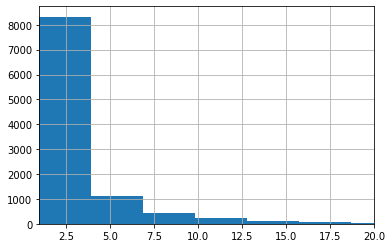

In [42]:
import seaborn as sns
plt = par_db_size.hist(bins=40)
plt.set(xlim=(1,20))

In [39]:
par_db_size.describe()

count   10173.000000
mean        3.205937
std         5.612938
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       119.000000
dtype: float64

In [14]:
sent_db.groupby("par_idx_in_doc").size()

par_idx_in_doc
0.000000      2
1.000000      1
2.000000      1
3.000000      1
4.000000      1
             ..
245.000000    2
246.000000    2
247.000000    1
248.000000    1
249.000000    1
Length: 250, dtype: int64

### Check for 2 sequential par of same type

In [92]:
for i in range (0,len(doc_db.index)):
    par_db = pd.read_csv(os.path.join(os.getcwd(),defines.PATH_TO_DFS,"{:02d}_par_db.csv".format(i+1)))
    same_vals= par_db['par_type'] == par_db.shift()['par_type']
    indices =same_vals[same_vals==True].index.values
#     print (indices)
    if len(indices) > 0:
        print ("Doc {} has {} same pars".format(i+1,len(indices)))
        for idx in indices:
            print ("\tSame vals  {} : par {}".format(idx, par_db.loc[idx,'text']))